<a href="https://colab.research.google.com/github/Chloe-it/250127/blob/main/%EC%88%98%ED%98%84%EC%88%98%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. USD/KRW <-> GOLD (2013~2023')
## Dataset  
###Gold :
- Title : 금값
- File Name : Gold Price (2013-2023).csv
- https://www.kaggle.com/code/farzadnekouei/gold-price-prediction-lstm-96-accuracy/input

### Exchange Rate (USD : KRW) :
- Title : 주요국 통화의 대원화 환율
- File Name : 환율_20250220162438
- https://snapshot.bok.or.kr/dashboard/B1

In [ ]:
# 🔥 1. 분석 및 모델 개요
# ✔ 목표:

# "USD/KRW 환율과 금값 간의 관계를 파악하고, 달러 가치(환율) 변화가 금값에 미치는 영향을 모델링"
# 상관관계를 확인한 뒤, 머신러닝 모델을 활용하여 "달러 가치가 변하면 금값이 어떻게 변할지" 예측
# ✔ 어떤 모델을 만들까?

# 간단한 선형 회귀(Linear Regression) 또는 랜덤 포레스트(Random Forest Regressor)
# 독립변수(X) → USD/KRW 환율
# 종속변수(y) → 금값(USD 기준)
# ✔ 분석 과정:
# 1️⃣ EDA (탐색적 데이터 분석)
# - USD/KRW 환율과 금값 데이터 불러오기 & 시각화
# - 상관관계 분석 (corr() 함수 활용)
# 2️⃣ 모델 학습 (달러 가치 vs 금값 패턴 학습)
# - 환율을 입력하면 금값을 예측하는 모델 학습
# 3️⃣ 예측 및 시각화
# - 특정 기간 동안 USD/KRW 환율이 변할 때 금값 변화를 예측하여 시각적으로 비교

# 🔥 2. 예상 결과
# 📌 모델이 성공하면?
# ✔ "USD/KRW 환율이 상승하면 금값이 하락하는 패턴"을 학습한 모델이 완성됨
# ✔ "앞으로 환율이 상승(원화 가치 하락)하면, 금값이 어느 정도 변할지 예측 가능"

# 📌 추가 확장 가능성
# ✅ 향후 DXY(달러 인덱스) 추가하여 글로벌 경제 요소까지 고려
# ✅ 머신러닝 모델을 고도화하여 비선형 모델(XGBoost 등) 적용 가능

# 🚀 최종 결론: 진행 가능 & 분석 방향 확정
# ✔ "USD/KRW 환율 vs 금값" 데이터 분석부터 시작
# ✔ 머신러닝 모델로 "환율이 변하면 금값이 어떻게 변할지" 예측
# ✔ 시각화를 통해 결과 비교


# 🔥 3. 구체적인 진행 방법 (Step-by-Step)
# 💡 각자의 역할을 더 구체적으로 정리해볼게!

# ✅ Step 1: 데이터 정제 (각자)
# 팀원 A: USD/KRW 환율 데이터 정리
# 팀원 B: 금값 데이터 정리
# 📌 최종적으로 같은 날짜(Date) 기준으로 정리 후 하나의 DataFrame으로 합침
# ✅ Step 2: EDA & 상관관계 분석 (팀원 A)
# 시계열 그래프: USD/KRW 환율, Gold Price (USD) 트렌드 확인
# 상관관계 분석: corr()을 사용해 금값 & 환율 관계 확인
# ✅ Step 3: 머신러닝 모델 개발 (팀원 B)
# USD/KRW를 입력(X), Gold Price (USD)를 출력(y)으로 설정
# 선형 회귀(LinearRegression) 또는 랜덤 포레스트(RandomForestRegressor) 모델 학습
# 모델 평가(MAE, RMSE 등)
# ✅ Step 4: 예측 & 시각화 (팀원 A)
# 학습된 모델을 사용해 미래 환율 변화에 따른 금값 예측
# 그래프(금값 vs 환율)를 그려서 결과 비교

#1-1. PKG & Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtl
import seaborn as sns


##1-2-1. 전처리(날짜형식 맞추기-> dt합치기)

In [ ]:
dt = pd.read_csv('/content/money_df.csv')
dt.head()

,date,currency,price,open,high,low,vol,change
0,2022-12-29,1264.5,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
1,2022-12-28,1267.0,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
2,2022-12-27,1271.4,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
3,2022-12-26,1274.8,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
4,2022-12-23,1280.8,"1,804.20","1,801.00","1,812.20","1,798.90",105.46K,0.50%


##1-2-2. 전처리(date열 object -> datetime 형으로 변환)

In [ ]:
dt.shape

(2449, 8)

In [ ]:
dt.dtypes

,0
date,object
currency,float64
price,object
open,object
high,object
low,object
vol,object
change,object


In [ ]:
dt['date']= pd.to_datetime(dt['date'], format= '%Y-%m-%d')

In [ ]:
pd.to_datetime(dt['date'])

,date
0,2022-12-29
1,2022-12-28
2,2022-12-27
3,2022-12-26
4,2022-12-23
...,...
2444,2013-01-08
2445,2013-01-07
2446,2013-01-04
2447,2013-01-03


In [ ]:
dt['date'].dtypes
print(dt.dtypes)

date        datetime64[ns]
currency           float64
price               object
open                object
high                object
low                 object
vol                 object
change              object
dtype: object


##1-2-3. 전처리(date, currency 를 제외한 모든 열 object -> float 형으로 변환 + 특수문자 제거)

In [ ]:
# ✅ 특수문자 제거 & 숫자로 변환 (소수점 2자리 유지)

# 숫자로 변환해야 하는 컬럼 리스트 (date 제외)
data = ['currency', 'price', 'open', 'high', 'low', 'vol', 'change']

for col in data:
    dt[col] = dt[col].astype(str)  # 문자열 변환 (혹시 NaN이 포함될 수도 있어서)
    dt[col] = dt[col].str.replace(',', '', regex=True)  # 쉼표 제거
    dt[col] = dt[col].str.replace('%', '', regex=True)  # % 제거

    # 거래량(Vol.)의 'K' 처리 (K 제거 후 소수점 유지)
    if col == 'vol':
        dt[col] = dt[col].str.replace('K', '', regex=True).astype(float)  # K 제거 후 float 변환

    else:
        dt[col] = pd.to_numeric(dt[col], errors='coerce')  # 숫자로 변환

# ✅ 소수점 2자리까지 유지 (반올림)
dt[data] = dt[data].round(2)

dt

,date,currency,price,open,high,low,vol,change
0,2022-12-29,1264.5,1826.0,1812.3,1827.30,1811.20,105.99,0.56
1,2022-12-28,1267.0,1815.8,1822.4,1822.80,1804.20,118.08,-0.40
2,2022-12-27,1271.4,1823.1,1808.2,1841.90,1808.00,159.62,0.74
3,2022-12-26,1274.8,1809.7,1805.8,1811.95,1805.55,NaN,0.30
4,2022-12-23,1280.8,1804.2,1801.0,1812.20,1798.90,105.46,0.50
...,...,...,...,...,...,...,...,...
2444,2013-01-08,1063.0,1663.2,1651.5,1662.60,1648.80,0.13,0.97
2445,2013-01-07,1063.7,1647.2,1657.3,1663.80,1645.30,0.09,-0.16
2446,2013-01-04,1063.6,1649.9,1664.4,1664.40,1630.00,0.31,-1.53
2447,2013-01-03,1061.5,1675.6,1688.0,1689.30,1664.30,0.19,-0.85


In [ ]:
dt.dtypes

,0
date,datetime64[ns]
currency,float64
price,float64
open,float64
high,float64
low,float64
vol,float64
change,float64


In [ ]:
dt.describe()

,date,currency,price,open,high,low,vol,change
count,2449,2449.000000,2449.000000,2449.000000,2449.000000,2449.000000,2445.000000,2449.000000
mean,2018-01-01 02:30:31.604736512,1145.466803,1440.693283,1440.962740,1449.992119,1431.186954,94.579751,0.011045
min,2013-01-02 00:00:00,1008.500000,1049.600000,1051.500000,1060.100000,1045.400000,0.000000,-9.340000
25%,2015-07-01 00:00:00,1101.400000,1244.000000,1243.900000,1251.500000,1235.800000,0.320000,-0.440000
50%,2018-01-03 00:00:00,1132.300000,1321.200000,1321.000000,1328.000000,1314.000000,7.470000,0.020000
75%,2020-07-06 00:00:00,1183.000000,1714.100000,1712.700000,1723.200000,1700.000000,175.590000,0.500000
max,2022-12-29 00:00:00,1439.900000,2058.400000,2065.100000,2078.700000,2037.200000,700.340000,5.970000
std,NaN,71.684754,257.510009,257.754296,259.828283,254.981521,118.044932,0.973246


##1-2-4. 컬럼명 변경

In [ ]:
# ✅ 컬럼명 변경
dt = dt.rename(columns={'currency': 'krw_er'})

# 변경된 컬럼 확인
print(dt.columns)

Index(['date', 'krw_er', 'price', 'open', 'high', 'low', 'vol', 'change'], dtype='object')


##1-2-5. 결측치 제거
- 원본 __ : 2449 rows × 8 columns
- 제거 후 : 2445 rows × 8 columns

In [ ]:
dt.isnull().sum()


,0
date,0
krw_er,0
price,0
open,0
high,0
low,0
vol,4
change,0


In [ ]:
dt = dt.dropna()
dt

,date,krw_er,price,open,high,low,vol,change
0,2022-12-29,1264.5,1826.0,1812.3,1827.3,1811.2,105.99,0.56
1,2022-12-28,1267.0,1815.8,1822.4,1822.8,1804.2,118.08,-0.40
2,2022-12-27,1271.4,1823.1,1808.2,1841.9,1808.0,159.62,0.74
4,2022-12-23,1280.8,1804.2,1801.0,1812.2,1798.9,105.46,0.50
5,2022-12-22,1276.2,1795.3,1823.8,1829.3,1792.7,175.77,-1.65
...,...,...,...,...,...,...,...,...
2444,2013-01-08,1063.0,1663.2,1651.5,1662.6,1648.8,0.13,0.97
2445,2013-01-07,1063.7,1647.2,1657.3,1663.8,1645.3,0.09,-0.16
2446,2013-01-04,1063.6,1649.9,1664.4,1664.4,1630.0,0.31,-1.53
2447,2013-01-03,1061.5,1675.6,1688.0,1689.3,1664.3,0.19,-0.85


##1-2-6. 이상치 제거

In [ ]:
# 2️⃣ 이상치 탐색 (IQR 활용)
Q1 = dt.quantile(0.25)  # 1사분위수 (Q1)
Q3 = dt.quantile(0.75)  # 3사분위수 (Q3)
IQR = Q3 - Q1  # 사분위 범위 (IQR)

# 이상치 기준 설정 (IQR 방식: Q1 - 1.5*IQR 이하, Q3 + 1.5*IQR 이상)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 판별
outliers = ((dt < lower_bound) | (dt > upper_bound)).sum()

# 결과 출력
outliers


,0
date,0
krw_er,94
price,0
open,0
high,0
low,0
vol,25
change,141


In [ ]:
# 이상치 결과 :
    # krw_er (환율) → 94개 이상치
    # vol (거래량) → 25개 이상치
    # change (변동률) → 141개 이상치

In [ ]:
# ✅ 이상치만 추출
outliers_dt = dt[
    (dt['krw_er'] < lower_bound['krw_er']) | (dt['krw_er'] > upper_bound['krw_er']) |
    (dt['vol'] < lower_bound['vol']) | (dt['vol'] > upper_bound['vol']) |
    (dt['change'] < lower_bound['change']) | (dt['change'] > upper_bound['change'])
]
print(f"이상치 개수: {outliers_dt.shape[0]}개")

display(outliers_dt)

이상치 개수: 247개


,date,krw_er,price,open,high,low,vol,change
9,2022-12-16,1305.4,1800.2,1786.9,1804.2,1783.9,128.75,0.69
12,2022-12-13,1306.0,1825.5,1792.3,1836.9,1791.8,230.91,1.85
13,2022-12-12,1307.2,1792.3,1808.0,1809.3,1789.0,107.78,-1.02
15,2022-12-08,1318.0,1801.5,1799.5,1806.9,1793.2,116.27,0.19
16,2022-12-07,1321.7,1798.0,1783.3,1803.2,1780.5,155.57,0.88
...,...,...,...,...,...,...,...,...
2360,2013-05-10,1106.1,1437.0,1455.0,1461.0,1419.4,0.37,-2.19
2370,2013-04-25,1112.1,1462.0,1430.3,1468.6,1426.3,197.32,2.69
2377,2013-04-16,1115.2,1387.4,1355.0,1404.2,1321.5,424.78,1.93
2378,2013-04-15,1120.5,1361.1,1481.0,1495.0,1335.1,700.34,-9.34


In [ ]:
# ✅ IQR 기반 이상치 다시 계산
Q1 = dt.quantile(0.25)
Q3 = dt.quantile(0.75)
IQR = Q3 - Q1

# ✅ 이상치 기준 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ✅ 이상치 판별 컬럼
outlier_columns = ['krw_er', 'vol', 'change']

# ✅ 이상치 여부를 표시할 새로운 컬럼 추가
for col in outlier_columns:
    dt[f'{col}_outlier_reason'] = 'Normal'  # 기본값은 정상

    # 이상치 조건 추가 (IQR 범위를 벗어난 경우)
    dt.loc[dt[col] < lower_bound[col], f'{col}_outlier_reason'] = f'Below Q1-1.5IQR ({lower_bound[col]:.2f})'
    dt.loc[dt[col] > upper_bound[col], f'{col}_outlier_reason'] = f'Above Q3+1.5IQR ({upper_bound[col]:.2f})'

# ✅ 이상치 데이터만 필터링해서 출력 (이유 포함)
outliers_dt = dt[
    (dt['krw_er'] < lower_bound['krw_er']) | (dt['krw_er'] > upper_bound['krw_er']) |
    (dt['vol'] < lower_bound['vol']) | (dt['vol'] > upper_bound['vol']) |
    (dt['change'] < lower_bound['change']) | (dt['change'] > upper_bound['change'])
]

# ✅ Colab에서 이상치 데이터 출력
display(outliers_dt[['date', 'krw_er', 'krw_er_outlier_reason', 'vol', 'vol_outlier_reason', 'change', 'change_outlier_reason']])


,date,krw_er,krw_er_outlier_reason,vol,vol_outlier_reason,change,change_outlier_reason
9,2022-12-16,1305.4,Above Q3+1.5IQR (1304.90),128.75,Normal,0.69,Normal
12,2022-12-13,1306.0,Above Q3+1.5IQR (1304.90),230.91,Normal,1.85,Normal
13,2022-12-12,1307.2,Above Q3+1.5IQR (1304.90),107.78,Normal,-1.02,Normal
15,2022-12-08,1318.0,Above Q3+1.5IQR (1304.90),116.27,Normal,0.19,Normal
16,2022-12-07,1321.7,Above Q3+1.5IQR (1304.90),155.57,Normal,0.88,Normal
...,...,...,...,...,...,...,...
2360,2013-05-10,1106.1,Normal,0.37,Normal,-2.19,Below Q1-1.5IQR (-1.85)
2370,2013-04-25,1112.1,Normal,197.32,Normal,2.69,Above Q3+1.5IQR (1.91)
2377,2013-04-16,1115.2,Normal,424.78,Normal,1.93,Above Q3+1.5IQR (1.91)
2378,2013-04-15,1120.5,Normal,700.34,Above Q3+1.5IQR (438.50),-9.34,Below Q1-1.5IQR (-1.85)


###1-2-6-1. Histogram & Boxplot

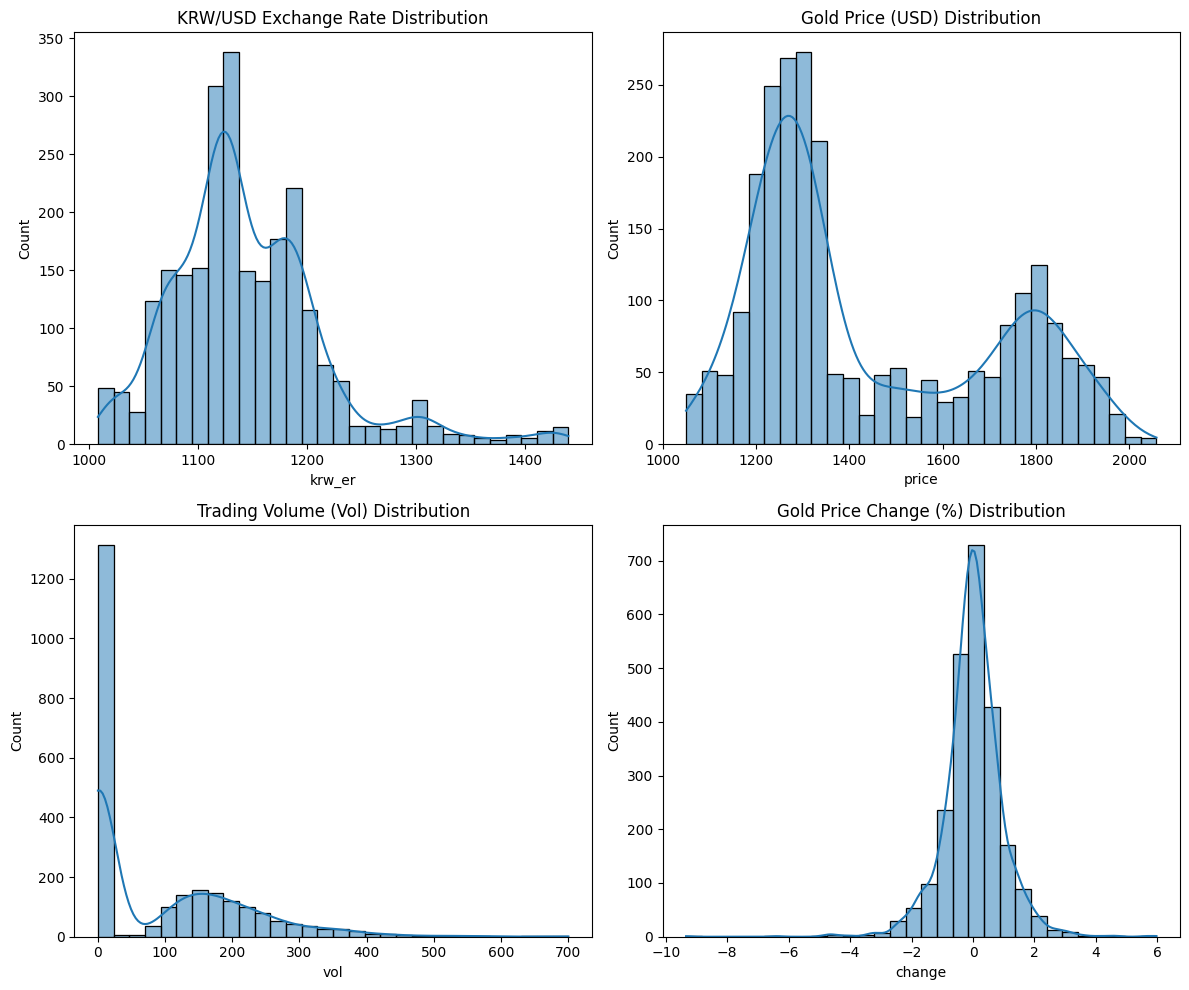

In [ ]:
# Histogram (Distribution of each variable)
columns = ['krw_er', 'price', 'vol', 'change']
titles = ['KRW/USD Exchange Rate Distribution', 'Gold Price (USD) Distribution',
          'Trading Volume (Vol) Distribution', 'Gold Price Change (%) Distribution']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(columns):
    sns.histplot(dt[col], bins=30, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(titles[i])

plt.tight_layout()
plt.show()

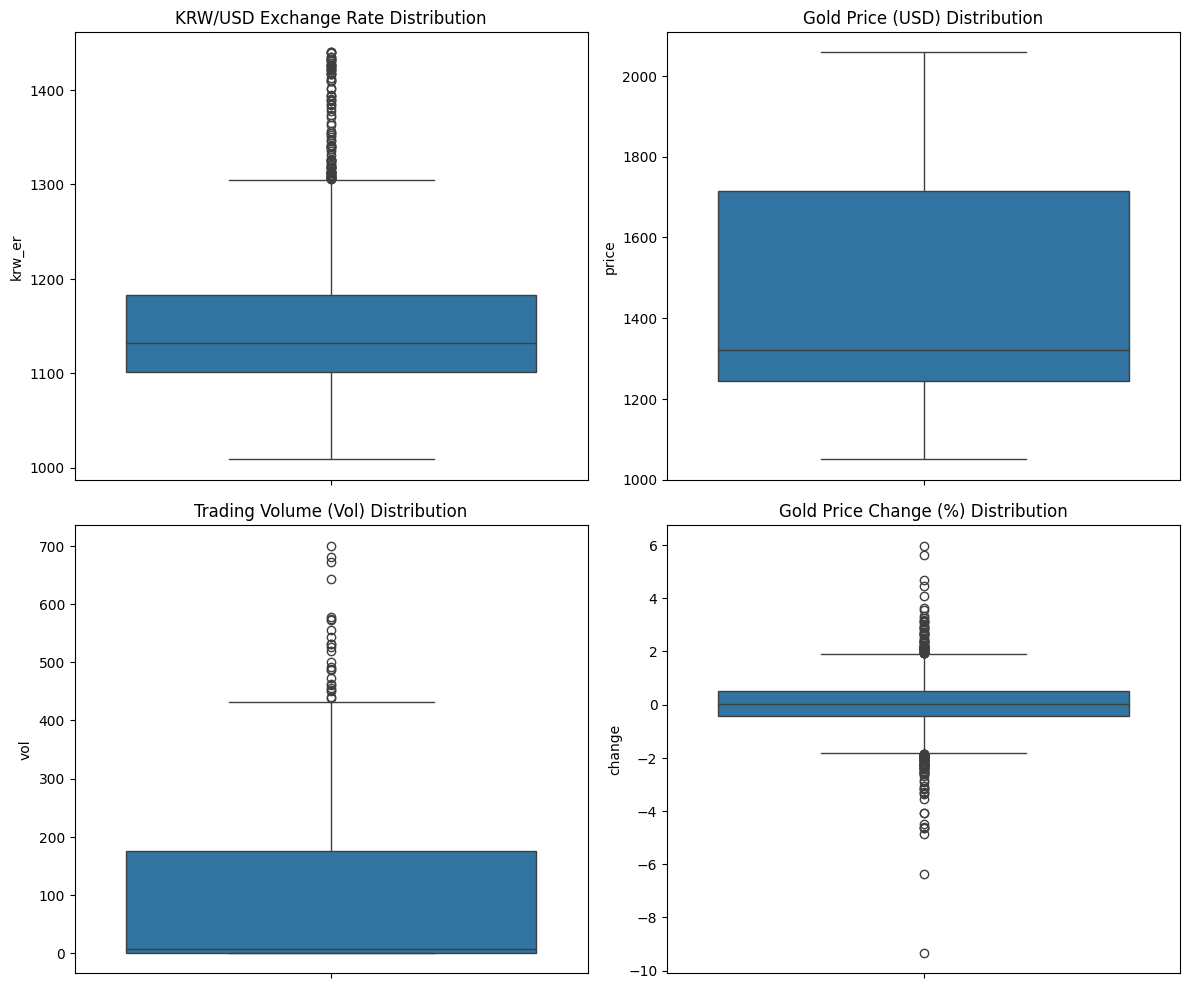

In [ ]:
#: Boxplot (Outlier detection)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(columns):
    sns.boxplot(y=dt[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(titles[i])

plt.tight_layout()
plt.show()


###1-2-6-2. 일단은 이상치 보류

##1-2-7. 상관관계 분석

###1-2-7-1. Scatter Plot [ 원화 환율 : 금 값(최종고시) / 거래량 : 금 값(최종고시) / 전일 대비 금값 변동율 : 금 값(최종고시) ]

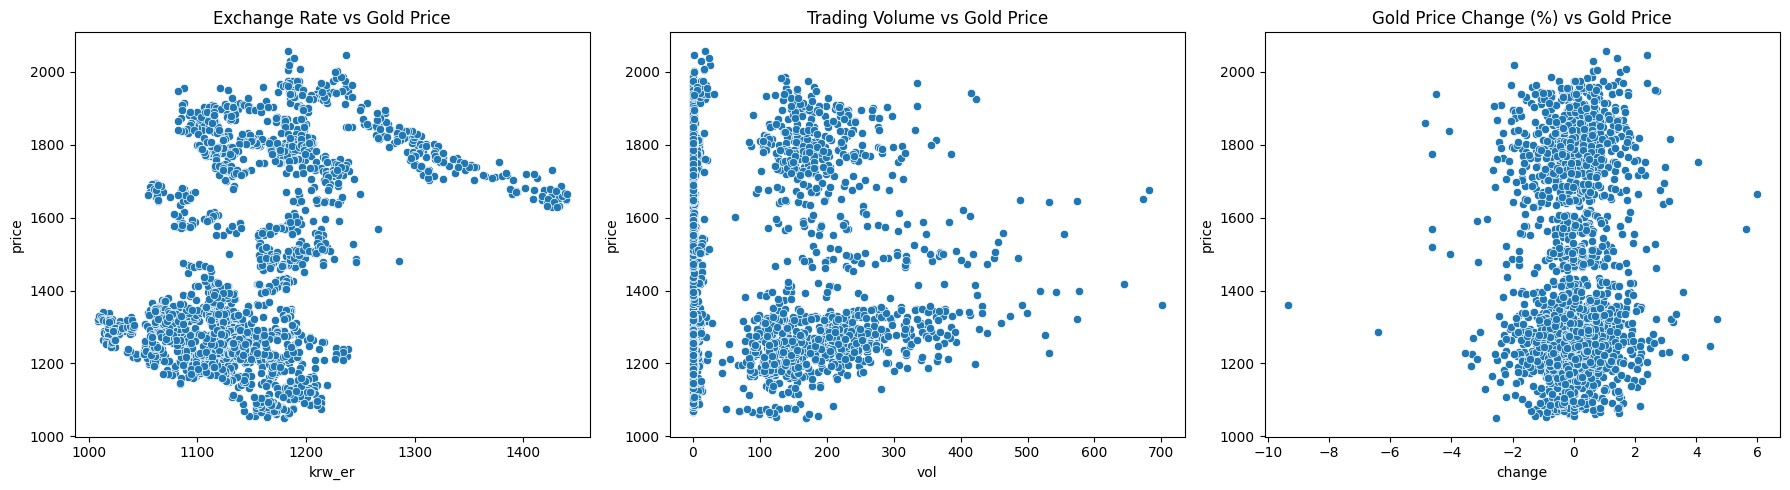

In [ ]:
# ✅ Scatter plot for each feature vs. gold price
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 원화 환율 : 금 값(최종고시)
sns.scatterplot(x=dt['krw_er'], y=dt['price'], ax=axes[0])
axes[0].set_title("Exchange Rate vs Gold Price")

# 거래량 : 금 값(최종고시)
sns.scatterplot(x=dt['vol'], y=dt['price'], ax=axes[1])
axes[1].set_title("Trading Volume vs Gold Price")

# 전일 대비 금값 변동율 : 금 값(최종고시)
sns.scatterplot(x=dt['change'], y=dt['price'], ax=axes[2])
axes[2].set_title("Gold Price Change (%) vs Gold Price")

plt.tight_layout()
plt.show()


###1-2-7-2. Heatmap ( 환율 / 거래량 / 금 값 (최종고시) )

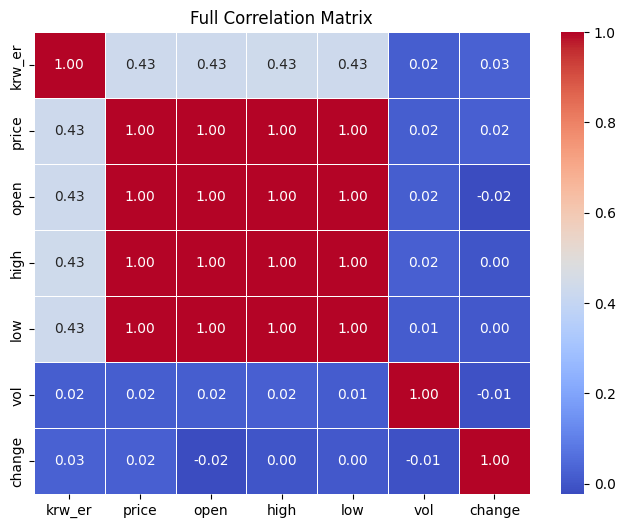

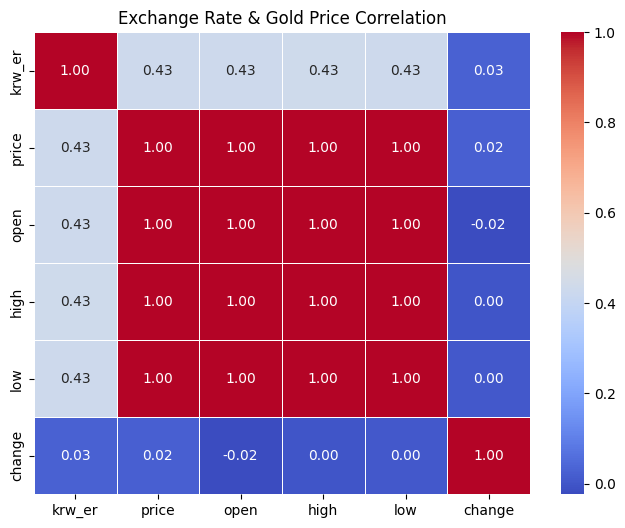

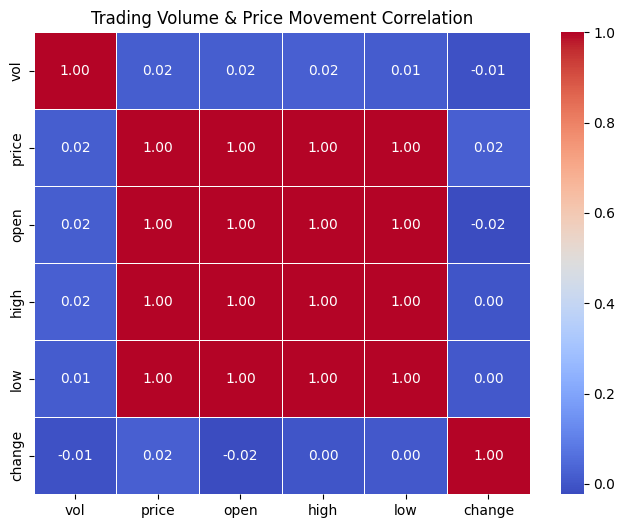

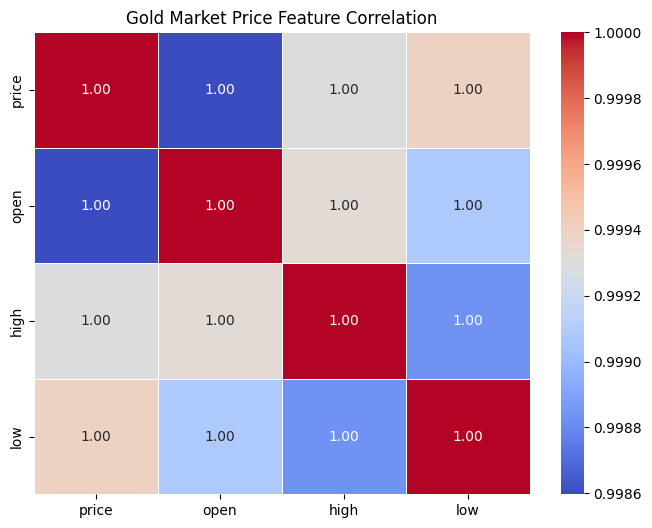

In [ ]:
# ✅ Extract all numeric columns (only numeric features can have correlations)
numeric_features = dt.select_dtypes(include=['number']).columns.tolist()

# ✅ Heatmap generation using a loop (Corrected)
heatmap_groups = {
    "Full Correlation Matrix": numeric_features,
    "Exchange Rate & Gold Price Correlation": ['krw_er', 'price', 'open', 'high', 'low', 'change'],
    "Trading Volume & Price Movement Correlation": ['vol', 'price', 'open', 'high', 'low', 'change'],
    "Gold Market Price Feature Correlation": ['price', 'open', 'high', 'low']
}

for title, features in heatmap_groups.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(dt[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()


### 1-2-7-3. 시계열 시각화 ( 금 값 : 환율 )

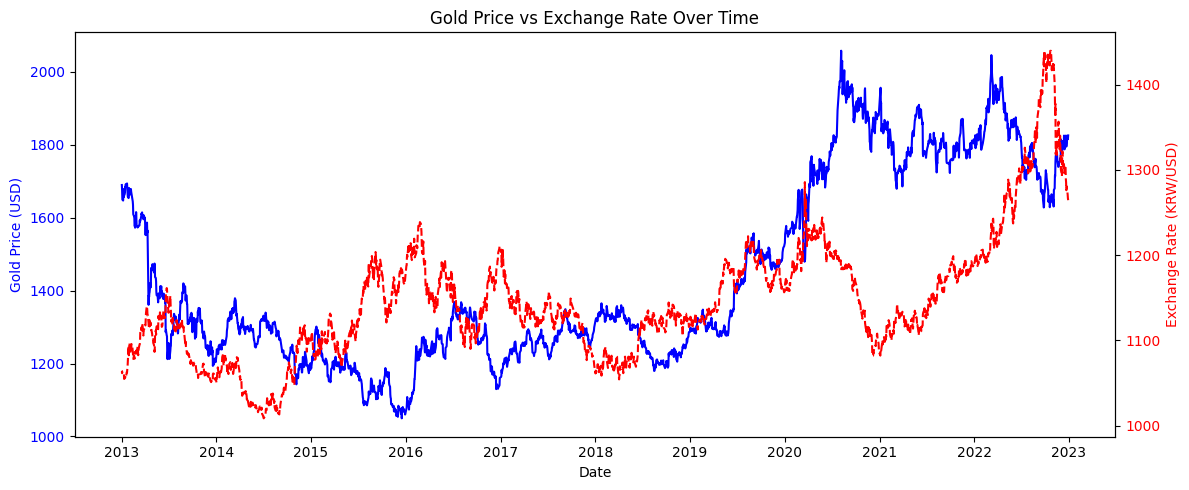

In [ ]:
# ✅ Plot gold price & exchange rate over time
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_xlabel("Date")
ax1.set_ylabel("Gold Price (USD)", color="blue")
ax1.plot(dt['date'], dt['price'], color="blue", label="Gold Price")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Exchange Rate (KRW/USD)", color="red")
ax2.plot(dt['date'], dt['krw_er'], color="red", linestyle="dashed", label="Exchange Rate")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Gold Price vs Exchange Rate Over Time")
fig.tight_layout()
plt.show()


#### 1-2-7-3-1. Scaled - 시계열 시각화 ( 금 값 : 환율 )

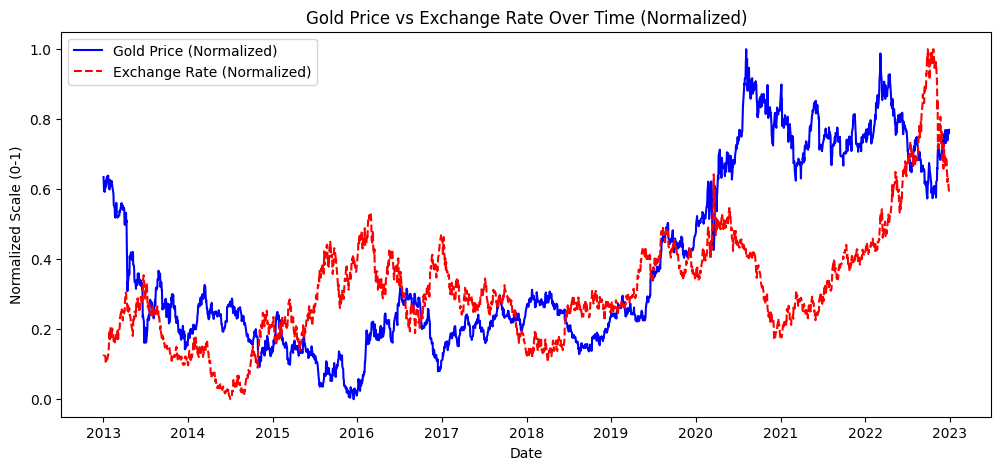

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ✅ Select columns for scaling
scaler = MinMaxScaler()
dt_scaled = dt.copy()

# ✅ Apply scaling (only for visualization, not affecting correlation)
dt_scaled[['krw_er', 'price']] = scaler.fit_transform(dt[['krw_er', 'price']])

# ✅ Plot normalized time series
fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(dt['date'], dt_scaled['price'], color='blue', label="Gold Price (Normalized)")
ax.plot(dt['date'], dt_scaled['krw_er'], color='red', linestyle='dashed', label="Exchange Rate (Normalized)")

ax.set_xlabel("Date")
ax.set_ylabel("Normalized Scale (0-1)")
plt.title("Gold Price vs Exchange Rate Over Time (Normalized)")
plt.legend()
plt.show()


#2.